In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t, chi2
import math

# t-Student distribution

## Definitions
- t-distribution is a continuous probability distribution that generalizes the standard normal distribution. Like the latter, it is symmetric around zero and bell-shaped. Its only parameter is the number of degrees of freedom. When this number tends to infinite, we obtain a normal distribution.
- Statistical hypothesis test. Method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis.
- A statistic (singular) or sample statistic is any quantity computed from values in a sample which is considered for a statistical purpose.
- A t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. It is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known (typically, the scaling term is unknown and therefore a nuisance parameter).
- Scaling term example: variance for normal distribution.
- The t-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error.
- In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct.


## Use case
We want to test whether the difference of means of three pairs of populations have the values we think they have (null hypothesis). We have extracted six samples, with the following characteristics.
- Pair 0. dof = inf, t_statistic = 1
- Pair A. dof = 20, t_statistic = 1.5
- Pair B. dof = 10, t_statistic = -0.7
- Pair C. dof = 5, t_statistic = -3.5

Compute p-value

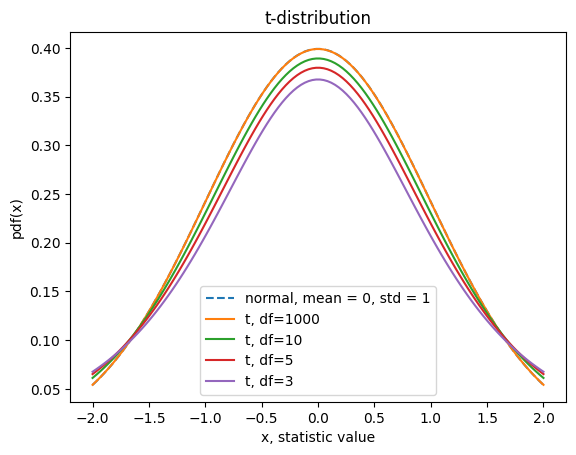

In [22]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(-2,2,120)
n=5
dofs = [1000,10,5, 3]
ax.plot(x, norm.pdf(x,0,1), "--", ms=4, label='normal, mean = 0, std = 1')

for i in range(len(dofs)):
    dof = dofs[i]
    ax.plot(x, t.pdf(x,dof), ms=4, label='t, df={}'.format(dof))

ax.set_xlabel("x, statistic value")
ax.set_ylabel("pdf(x)")
ax.set_title("t-distribution")
ax.legend()

In [18]:
t_statistics = [1, 1.5, -0.7, -3.5]

for i in range(len(t_statistics)):
    abs_value = abs(t_statistics[i])
    dof = dofs[i]
    print("t-student, dof={}: The probability to obtain an absolute value higher than {} for the t_statistic is {}".format(dof,abs_value,2*(1-t.cdf(abs_value, dof))))

t-student, dof=1000: The probability to obtain an absolute value higher than 1 for the t_statistic is 0.3175524180846727
t-student, dof=10: The probability to obtain an absolute value higher than 1.5 for the t_statistic is 0.1645073264454402
t-student, dof=5: The probability to obtain an absolute value higher than 0.7 for the t_statistic is 0.5151489483148164
t-student, dof=3: The probability to obtain an absolute value higher than 3.5 for the t_statistic is 0.0394810376192829


# Chi-squared distribution
## Definitions
- Chi-squared distribution with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables.
- Significance level: a study's defined significance level, denoted by alpha , is the probability of the study rejecting the null hypothesis, given that the null hypothesis is true.
- Critical vs acceptance region: The distribution of the test statistic under the null hypothesis partitions the possible values of T into those for which the null hypothesis is rejected—the so-called critical region—and those for which it is not-the acceptance region. The probability of T occurring in the critical region under the null hypothesis is α. 
## Use case
Being a function of random variables, the sample variance (S2) is itself a random variable, and it is natural to study its distribution. In the case that Yi are independent observations from a normal distribution, Cochran's theorem shows that S2 follows a scaled chi-squared distribution.

Let's compute the acceptance region for the statistic S2, when we have different degrees of freedom. H_0: variance = 2
- dof = 10 (sample size = 11)
- dof = 20 (sample size = 21)
- dof = 50 (sample size = 51)
- dof = 80


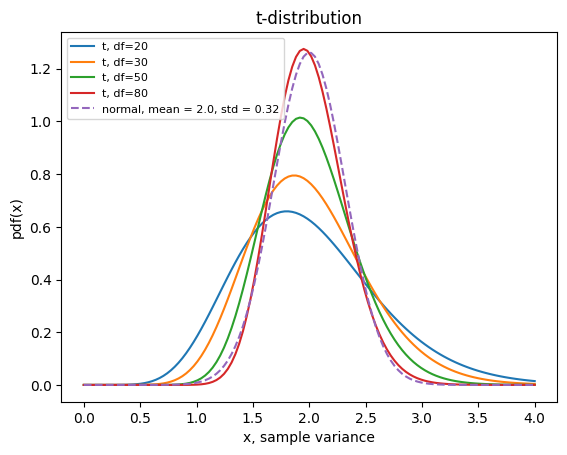

In [47]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0,4,120)
n=5
dofs = [20, 30, 50, 80]
#ax.plot(x, norm.pdf(x,0,1), "--", ms=4, label='normal, mean = 0, std = 1')

for i in range(len(dofs)):
    dof = dofs[i]
    ax.plot(x, chi2.pdf(x,dof, scale = 2/(dof)), ms=4, label='t, df={}'.format(dof))
norm_mean = chi2.mean(dof, scale = 2/(dof))
norm_std = chi2.std(dof, scale = 2/(dof))
ax.plot(x, norm.pdf(x,norm_mean,norm_std), "--", ms=4, label='normal, mean = {}, std = {}'.format(round(norm_mean,2), round(norm_std,2)))

ax.set_xlabel("x, sample variance")
ax.set_ylabel("pdf(x)")
ax.set_title("t-distribution")
ax.legend(loc="upper left",prop={'size': 8})

In [51]:
for i in range(len(dofs)):
    dof = dofs[i]
    acceptance_region = (chi2.ppf(0.025,dof, scale = 2/(dof)),chi2.ppf(0.975,dof, scale = 2/(dof)))
    print("If we have a sample size = {}, and want a significance level alpha = {}, the acceptance region is: {}".format(dof+1, 0.05,acceptance_region))

If we have a sample size = 21, and want a significance level alpha = 0.05, the acceptance region is: (0.9590777392264868, 3.416960690283833)
If we have a sample size = 31, and want a significance level alpha = 0.05, the acceptance region is: (1.119384817704442, 3.13194948291141)
If we have a sample size = 51, and want a significance level alpha = 0.05, the acceptance region is: (1.294294547826346, 2.8568078075002568)
If we have a sample size = 81, and want a significance level alpha = 0.05, the acceptance region is: (1.4288293220894484, 2.665714193291642)
